In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
class DataClean:
    def __init__(self):
        
        pass

    def Arrivals_column_cleaning(self, df, col): # dtype was object, so to change to float

        def clean(arrival):
            if isinstance(arrival, str):
                return arrival.replace(',', '')
            else:
                return arrival
        df[col]=df[col].apply(clean)
        
        # df[col]=df[col].str.replace(',','')
        df[col]=df[col].astype(float)
        return df[col]

    def Null_Value_Handling(self,df, col): #replacing na with mode
        
        n=df[col].mode()[0]
        print(n)
        df[col]=df[col].fillna(n)
        return df[col]

    def unique_items(self,df,col):
        
        return df[col].unique()

    def drop_col(self, df, col):
        
        df.drop(columns=col,inplace=True)        

    def check_na_sum(self,df):
        
        return df.isna().sum()

    def pie_chart(self,df,col):
        
        plt.pie(df[col].value_counts(),labels=df[col].value_counts().index)
    

    def histogram(self,col): #plotting histogram
        
        plt.hist(col)


    def tonne_to_quintal(self, quant): #tonne to quintal conversion
        
        return quant*10

    def apply_func(self, df, col, func):
        
        df[col]=df[col].apply(func)
        

    def col_rename(self, old, new):
        df.rename(columns={
            old:new
        }, inplace= True)


    def date_conversion(self, df, col):
        
        df[col]=pd.to_datetime(df[col])
        df['Year']=df[col].dt.year
        df['Month']=df[col].dt.month

    def month_to_string(self, month):
        months=[m for m in calendar.month_name if m]
        return months[month-1]


In [3]:
dc=DataClean()

In [10]:
# df=pd.read_excel("Agmarknet_Price_And_Arrival_Report (1).xlsx",header=1)
df=pd.read_csv('agridata.csv')

In [11]:
df.head()

,Unnamed: 0,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,0,Punjab,Fazilka,Abohar,Other,Cereals,100.0,2130.0,2130.0,2130.0,2023-05-26
1,1,Punjab,Fazilka,Abohar,Other,Cereals,136.0,2125.0,2125.0,2125.0,2023-05-25
2,2,Punjab,Fazilka,Abohar,Other,Cereals,256.0,2125.0,2130.0,2125.0,2023-05-24
3,3,Punjab,Fazilka,Abohar,Other,Cereals,270.0,2125.0,2130.0,2125.0,2023-05-23
4,4,Punjab,Fazilka,Abohar,Other,Cereals,474.0,2125.0,2130.0,2125.0,2023-05-22


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35131 entries, 0 to 35130
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 35131 non-null  int64  
 1   State Name                 35131 non-null  object 
 2   District Name              35131 non-null  object 
 3   Market Name                35131 non-null  object 
 4   Variety                    35131 non-null  object 
 5   Group                      35131 non-null  object 
 6   Arrivals (Tonnes)          34551 non-null  object 
 7   Min Price (Rs./Quintal)    35131 non-null  float64
 8   Max Price (Rs./Quintal)    35131 non-null  float64
 9   Modal Price (Rs./Quintal)  35131 non-null  float64
 10  Reported Date              35131 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.9+ MB


In [13]:
dc.check_na_sum(df)

Unnamed: 0                     0
State Name                     0
District Name                  0
Market Name                    0
Variety                        0
Group                          0
Arrivals (Tonnes)            580
Min Price (Rs./Quintal)        0
Max Price (Rs./Quintal)        0
Modal Price (Rs./Quintal)      0
Reported Date                  0
dtype: int64

In [14]:
df['Arrivals (Tonnes)']=dc.Arrivals_column_cleaning(df, 'Arrivals (Tonnes)')

In [15]:
dc.check_na_sum(df)

Unnamed: 0                     0
State Name                     0
District Name                  0
Market Name                    0
Variety                        0
Group                          0
Arrivals (Tonnes)            580
Min Price (Rs./Quintal)        0
Max Price (Rs./Quintal)        0
Modal Price (Rs./Quintal)      0
Reported Date                  0
dtype: int64

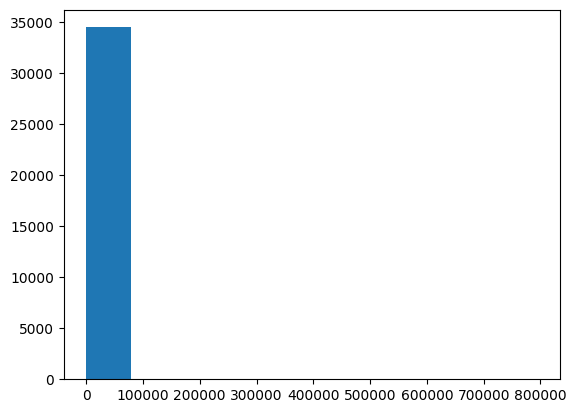

In [16]:
dc.histogram(df['Arrivals (Tonnes)'])

In [17]:
df['Arrivals (Tonnes)'] = dc.Null_Value_Handling(df, 'Arrivals (Tonnes)')

100.0


In [18]:
dc.check_na_sum(df)

Unnamed: 0                   0
State Name                   0
District Name                0
Market Name                  0
Variety                      0
Group                        0
Arrivals (Tonnes)            0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Reported Date                0
dtype: int64

In [19]:
dc.unique_items(df,'Variety')

array(['Other', '147 Average', '2329', 'Deshi', 'Local', '343', 'HD-2329',
       'PBW-343', '147 Best', 'Punjab - Sona Kalyan', 'Chandausi',
       'Super Fine', 'Kanak', 'Medium', '1482', 'Hybrid', 'Superior',
       'WL711', '2189 No. 1', 'PBW-373', 'Coarse', 'WH-542', 'Kalyan',
       'White', 'PBW-154'], dtype=object)

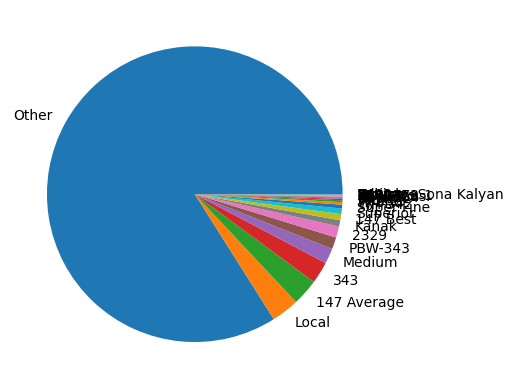

In [20]:
dc.pie_chart(df,'Variety')

In [21]:
dc.unique_items(df,'State Name')
dc.drop_col(df,'State Name')
df.head()

,Unnamed: 0,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,0,Fazilka,Abohar,Other,Cereals,100.0,2130.0,2130.0,2130.0,2023-05-26
1,1,Fazilka,Abohar,Other,Cereals,136.0,2125.0,2125.0,2125.0,2023-05-25
2,2,Fazilka,Abohar,Other,Cereals,256.0,2125.0,2130.0,2125.0,2023-05-24
3,3,Fazilka,Abohar,Other,Cereals,270.0,2125.0,2130.0,2125.0,2023-05-23
4,4,Fazilka,Abohar,Other,Cereals,474.0,2125.0,2130.0,2125.0,2023-05-22


In [22]:
dc.unique_items(df,'Market Name')

array(['Abohar', 'Adampur', 'Ajitwal', 'Ajitwal (Chogawan)',
       'Ajitwal (Dala)', 'Ajnala', 'Ajnala (Sudhar)', 'Amargarh', 'Amloh',
       'Amloh(Gobind Garh Mandi)', 'Amritsar', 'Amritsar(Chehreta)',
       'Anandpur Sahib', 'Attari', 'Badhni Kalan',
       'Badhni Kallan (Bilaspur)', 'Baghapurana', 'Banga',
       'Banga (Kataria)', 'Banur', 'Banur (Kheragaju)', 'Bareta',
       'Bariwala', 'Barnala', 'Bassi Pathana', 'Bhadaur',
       'Bhadaur(Sehna)', 'Bhadson', 'Bhagta Bhai Ka',
       'Bhagta Bhai Ka (Jalal)', 'Bhagta Bhai Ka(Kotha Guru Ka)',
       'Bhawanigarh', 'Bhikhi', 'Bhikhiwind', 'Bhikhiwind (Algo)',
       'Bhikhiwind (Basarke)', 'Bhikhiwind (Marrimegha)',
       'Bhikhiwind (Sursingh)', 'Bhikhiwind(Khalra)', 'Bhucho', 'Bhulath',
       'Bhulath (Ibrahimaaaaval)', 'Bhulath (Nadala)', 'Bilga',
       'Bilga (Talwan )', 'Boha', 'Budalada', 'Budhlada (Phaphre Bhaike)',
       'Chabhal', 'Chanarthal', 'Cheema', 'Dakala', 'Dasuya',
       'Dera Bassi', 'Dhanaula', 'Dhanul

In [23]:
dc.apply_func(df, 'Arrivals (Tonnes)', dc.tonne_to_quintal) #convert the Arrivals in Tonnes to Quintal
dc.col_rename('Arrivals (Tonnes)', 'Arrivals (Quintal)')
df.head()

,Unnamed: 0,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,0,Fazilka,Abohar,Other,Cereals,1000.0,2130.0,2130.0,2130.0,2023-05-26
1,1,Fazilka,Abohar,Other,Cereals,1360.0,2125.0,2125.0,2125.0,2023-05-25
2,2,Fazilka,Abohar,Other,Cereals,2560.0,2125.0,2130.0,2125.0,2023-05-24
3,3,Fazilka,Abohar,Other,Cereals,2700.0,2125.0,2130.0,2125.0,2023-05-23
4,4,Fazilka,Abohar,Other,Cereals,4740.0,2125.0,2130.0,2125.0,2023-05-22


In [24]:
dc.date_conversion(df, 'Reported Date')
df.tail()

,Unnamed: 0,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
35126,6618,Ferozpur,Zira,Other,Cereals,34650.0,1100.0,1100.0,1100.0,2010-04-12,2010,4
35127,6619,Ferozpur,Zira,Other,Cereals,20200.0,1100.0,1100.0,1100.0,2010-04-11,2010,4
35128,6620,Ferozpur,Zira,Other,Cereals,13100.0,1100.0,1100.0,1100.0,2010-04-10,2010,4
35129,6621,Ferozpur,Zira,Other,Cereals,1000.0,1100.0,1100.0,1100.0,2010-04-09,2010,4
35130,6622,Ferozpur,Zira,Other,Cereals,500.0,1100.0,1100.0,1100.0,2010-04-08,2010,4


In [25]:
dc.apply_func(df, 'Month', dc.month_to_string)
df.tail()

,Unnamed: 0,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
35126,6618,Ferozpur,Zira,Other,Cereals,34650.0,1100.0,1100.0,1100.0,2010-04-12,2010,April
35127,6619,Ferozpur,Zira,Other,Cereals,20200.0,1100.0,1100.0,1100.0,2010-04-11,2010,April
35128,6620,Ferozpur,Zira,Other,Cereals,13100.0,1100.0,1100.0,1100.0,2010-04-10,2010,April
35129,6621,Ferozpur,Zira,Other,Cereals,1000.0,1100.0,1100.0,1100.0,2010-04-09,2010,April
35130,6622,Ferozpur,Zira,Other,Cereals,500.0,1100.0,1100.0,1100.0,2010-04-08,2010,April


In [26]:
df.head()

,Unnamed: 0,District Name,Market Name,Variety,Group,Arrivals (Quintal),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date,Year,Month
0,0,Fazilka,Abohar,Other,Cereals,1000.0,2130.0,2130.0,2130.0,2023-05-26,2023,May
1,1,Fazilka,Abohar,Other,Cereals,1360.0,2125.0,2125.0,2125.0,2023-05-25,2023,May
2,2,Fazilka,Abohar,Other,Cereals,2560.0,2125.0,2130.0,2125.0,2023-05-24,2023,May
3,3,Fazilka,Abohar,Other,Cereals,2700.0,2125.0,2130.0,2125.0,2023-05-23,2023,May
4,4,Fazilka,Abohar,Other,Cereals,4740.0,2125.0,2130.0,2125.0,2023-05-22,2023,May


In [27]:
df.to_csv('Datacleaned.csv', index=False)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35131 entries, 0 to 35130
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 0                 35131 non-null  int64         
 1   District Name              35131 non-null  object        
 2   Market Name                35131 non-null  object        
 3   Variety                    35131 non-null  object        
 4   Group                      35131 non-null  object        
 5   Arrivals (Quintal)         35131 non-null  float64       
 6   Min Price (Rs./Quintal)    35131 non-null  float64       
 7   Max Price (Rs./Quintal)    35131 non-null  float64       
 8   Modal Price (Rs./Quintal)  35131 non-null  float64       
 9   Reported Date              35131 non-null  datetime64[ns]
 10  Year                       35131 non-null  int32         
 11  Month                      35131 non-null  object        
dtypes: d

In [32]:
print(df['Year'].unique())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]
